## KNN Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.
Binary Classification yielded a maximum accuracy of 77.53%. Severity Classification (multiple classes) was around 56%.

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [186]:
# df = pd.read_csv("full_dataset_v1.csv")
# df = pd.read_csv("/Users/ishaanjavali/Documents/Science Fair/2020/Code/API/full_dataset_v1.csv")
df = pd.read_csv("/Users/ishaanjavali/Documents/Science Fair/2020/Code/API/full_dataset_good.csv")

In [187]:
df['severity'].value_counts()

na              4476
medium          3300
small            612
large            426
unknown           75
very_large        56
...                5
landslide          2
catastrophic       1
Name: severity, dtype: int64

In [188]:
# filter by severity. na is for non-landslide data
df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
# Remove -1 slopes
df = df.loc[~(df.slope == -1)]

na                     4476
landslide              3681
mudslide                371
rock_fall               150
complex                  75
debris_flow              39
other                    24
riverbank_collapse       23
unknown                   9
translational_slide       7
snow_avalanche            6
lahar                     3
earth_flow                3
rotational_slide          2
...                       1
Name: type, dtype: int64


In [189]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))

8870


In [190]:
def getX():
    X = df.copy()

    X.drop(X.columns[[i for i in range(0, 151)]], axis = 1, inplace = True)
    # X.drop(X.columns[[i for i in range(20, 35)]], axis = 1, inplace = True)
    X["severity"] = df["severity"]
    X.drop(X.columns[[0]], axis = 1, inplace = True)

    X = X.dropna()
    for i in range(0, 8):
        del X['air' + str(i)]
        del X['temp' + str(i)]
        del X['humidity' + str(i)]
        
    X.drop(X.columns[[i for i in range(len(X.columns)-8, len(X.columns)-2)]], axis = 1, inplace = True)
    return X
X = getX()
X

,precip7,wind7,precip6,wind6,precip5,wind5,precip4,wind4,precip3,wind3,slope,severity
0,8.7,14,5.9,11,3.9,12,7.0,10,13.8,17,25,na
1,0.1,3,0.1,5,0.1,4,0.2,3,1.3,3,36,na
2,2.7,9,0.0,5,16.1,6,1.8,6,1.8,12,125,large
3,0.0,5,0.2,5,0.0,8,0.0,7,0.3,6,72,na
4,0.0,21,0.0,21,0.0,21,0.0,14,0.0,17,13,na
...,...,...,...,...,...,...,...,...,...,...,...,...
8865,0.0,6,4.5,6,15.2,8,2.4,13,0.3,13,132,medium
8866,0.9,35,0.1,35,0.0,31,0.0,19,0.0,15,43,na
8867,0.0,14,1.9,11,0.4,13,0.2,14,0.3,14,116,na
8868,0.0,14,0.1,13,0.0,10,0.0,12,0.0,10,60,medium


### Generate Labels
For binary classification, pass `True` into the function call

In [191]:
def generate_labels(binary = False):
    global X
    X = getX()
    y = []
    idx_to_severity = ["na", "small", "medium", "large", "very_large"]
    for severity in X.severity:
        if not binary:
            y.append(idx_to_severity.index(severity))
        elif severity == "na":
            y.append(0)
        else:
            y.append(1)
    X.drop(X.columns[[-1]], axis = 1, inplace = True)
    print(y.count(1))
    return y

In [192]:
binary = True
y = generate_labels(binary)

4394


## Scaling

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Prediction

In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [195]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test)
class_probabilities = knn.predict_proba(X_test)
print("ACCURACY:", accuracy_score(pred, y_test))

ACCURACY: 0.5620067643742954


In [196]:
best = 1
highest = 0

for i in range(1, 130):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = round(accuracy_score(pred, y_test)*10000)/100
    print("k =", i, "  ACCURACY:", score)
    if score > highest:
        highest = score
        best = i
# Binary: k = 87, 58.9
# 62.4 na/landslide
print("Best k:", best, highest)

k = 1   ACCURACY: 60.48
k = 2   ACCURACY: 58.85
k = 3   ACCURACY: 58.57
k = 4   ACCURACY: 56.99
k = 5   ACCURACY: 58.62
k = 6   ACCURACY: 56.71
k = 7   ACCURACY: 57.55
k = 8   ACCURACY: 56.93
k = 9   ACCURACY: 57.16
k = 10   ACCURACY: 56.14
k = 11   ACCURACY: 55.98
k = 12   ACCURACY: 55.64
k = 13   ACCURACY: 56.99
k = 14   ACCURACY: 56.48
k = 15   ACCURACY: 57.5
k = 16   ACCURACY: 55.81
k = 17   ACCURACY: 56.2
k = 18   ACCURACY: 55.07
k = 19   ACCURACY: 55.19
k = 20   ACCURACY: 54.4
k = 21   ACCURACY: 55.3
k = 22   ACCURACY: 54.51
k = 23   ACCURACY: 55.24
k = 24   ACCURACY: 54.9
k = 25   ACCURACY: 55.13
k = 26   ACCURACY: 54.45
k = 27   ACCURACY: 55.19
k = 28   ACCURACY: 54.9
k = 29   ACCURACY: 55.24
k = 30   ACCURACY: 55.13
k = 31   ACCURACY: 55.02
k = 32   ACCURACY: 55.13
k = 33   ACCURACY: 54.68
k = 34   ACCURACY: 54.85
k = 35   ACCURACY: 55.69
k = 36   ACCURACY: 55.19
k = 37   ACCURACY: 56.14
k = 38   ACCURACY: 55.86
k = 39   ACCURACY: 55.98
k = 40   ACCURACY: 56.03
k = 41   ACCURA

## Confusion Matrix

In [197]:
knn = KNeighborsClassifier(n_neighbors=87)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(pred, y_test)

0.5744081172491544

In [198]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

array([[591, 294],
       [461, 428]])

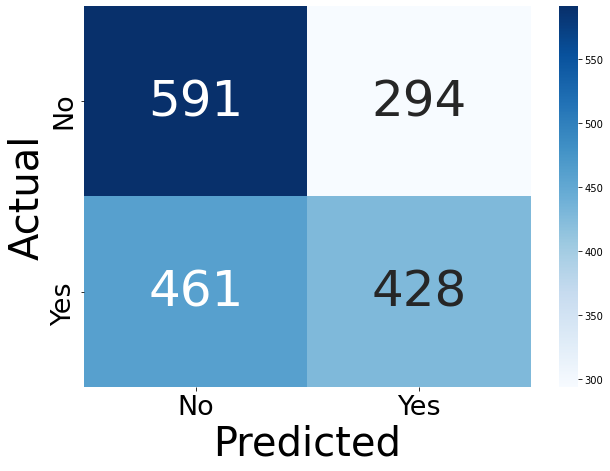

In [199]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 

plt.show()